### وارد کردن کتابخانه‌ها
در این بخش، کتابخانه‌های لازم برای پردازش تصویر و نمایش داده‌ها را وارد می‌کنیم:
- `numpy` برای کار با آرایه‌های چندبعدی.
- `cv2` برای پردازش تصویر و اعمال فیلترها.
- `matplotlib.pyplot` برای نمایش تصاویر در یک گرید گرافیکی.


In [1]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### بارگذاری تصویر اصلی
در این بخش، تصویر اصلی را از مسیر مشخص شده به صورت سیاه و سفید بارگذاری می‌کنیم. تابع `cv.imread` با پارامتر `0` تصویر را در حالت خاکستری (grayscale) بارگذاری می‌کند که برای پردازش لبه مناسب است.

In [2]:
# Load the original image in grayscale mode from the specified path
original_image = cv.imread('../src/road.jpg', 0)

### حذف نویز با Gaussian Blur
در این بخش، از فیلتر Gaussian Blur برای کاهش نویز تصویر استفاده می‌کنیم. این کار به کمک تابع `cv.GaussianBlur` انجام می‌شود که موجب صاف‌تر شدن تصویر شده و برای تشخیص لبه‌ها در مراحل بعدی مفید است.

In [3]:
# Apply Gaussian blur to reduce noise and smooth the image
denoised_image = cv.GaussianBlur(original_image, (7, 7), 0)

### تشخیص لبه با فیلتر لاپلاسین
در این بخش، فیلتر لاپلاسین (Laplacian) را اعمال می‌کنیم تا لبه‌های تصویر را بر اساس مشتق مرتبه دوم تشخیص دهیم. این فیلتر کمک می‌کند تغییرات سریع شدت رنگ در تصویر شناسایی شوند.

In [4]:
# Apply the Laplacian operator to detect edges based on second-order derivatives
laplacian_edges = cv.Laplacian(denoised_image, cv.CV_64F)

### تشخیص لبه با فیلتر سوبل (Sobel)
در این بخش، از فیلتر سوبل (Sobel) در دو جهت X و Y استفاده می‌کنیم:
- `sobel_x_edges`: تشخیص لبه‌ها در جهت افقی با مقدار مشتق X.
- `sobel_y_edges`: تشخیص لبه‌ها در جهت عمودی با مقدار مشتق Y.
این دو تصویر به ما لبه‌های افقی و عمودی را به صورت جداگانه نشان می‌دهند.

In [5]:
# Apply the Sobel operator in the X direction to detect horizontal edges
sobel_x_edges = cv.Sobel(denoised_image, cv.CV_64F, 1, 0, ksize=5)
# Apply the Sobel operator in the Y direction to detect vertical edges
sobel_y_edges = cv.Sobel(denoised_image, cv.CV_64F, 0, 1, ksize=5)

### تشخیص لبه با الگوریتم کاننی
در این بخش، از الگوریتم کاننی (Canny) برای تشخیص لبه استفاده می‌کنیم. این الگوریتم لبه‌ها را به شکلی جامع‌تر تشخیص می‌دهد و شامل مراحلی مثل حذف نویز، تشخیص لبه‌های قوی و تضعیف لبه‌های ضعیف است.

In [6]:
# Apply the Canny edge detector for a comprehensive edge detection
canny_edges = cv.Canny(denoised_image, 50, 150)

### نمایش تصاویر پردازش‌شده
در این بخش، یک گرید تصویری برای نمایش نتایج حاصل از فیلترهای مختلف ایجاد می‌کنیم:
- ابتدا یک شبکه با ۳ ردیف و ۲ ستون ایجاد می‌شود تا بتوانیم ۶ تصویر را نمایش دهیم.
- هر تصویر با یک عنوان در موقعیت مربوطه نمایش داده می‌شود:
  - `Original Image`: تصویر اصلی.
  - `Laplacian`: تصویر حاصل از فیلتر لاپلاسین.
  - `Sobel X`: تصویر لبه‌های افقی حاصل از فیلتر سوبل.
  - `Sobel Y`: تصویر لبه‌های عمودی حاصل از فیلتر سوبل.
  - `Canny`: تصویر حاصل از الگوریتم کاننی.
  - یک پنل خالی برای تقارن ظاهری گرید.
- در نهایت، تمامی تصاویر در گرید به کمک تابع `plt.show()` نمایش داده می‌شوند.

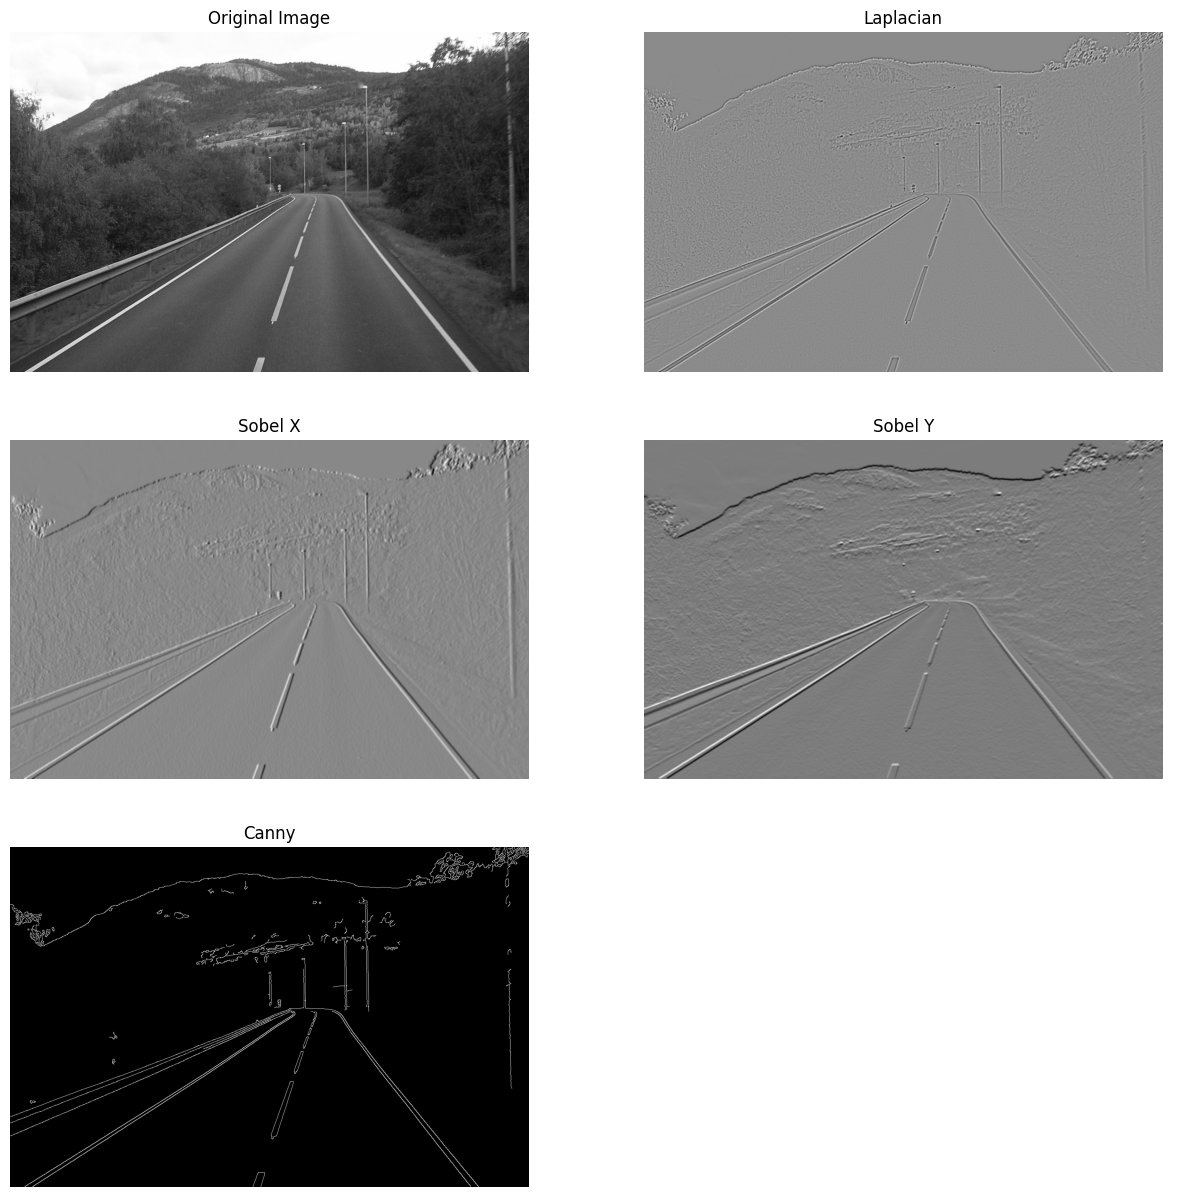

In [7]:
# Set up a subplot grid with 3 rows and 2 columns for displaying images
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
(ax1, ax2, ax3, ax4, ax5, ax6) = axes.flatten()  # Flatten for easy indexing

# Display the original image with title, disabling axis for cleaner view
ax1.axis('off')
ax1.set_title('Original Image')
ax1.imshow(cv.cvtColor(original_image, cv.COLOR_GRAY2RGB))

# Display the Laplacian edge-detected image with title
ax2.axis('off')
ax2.set_title('Laplacian')
ax2.imshow(laplacian_edges, cmap='gray')

# Display the Sobel X edge-detected image with title
ax3.axis('off')
ax3.set_title('Sobel X')
ax3.imshow(sobel_x_edges, cmap='gray')

# Display the Sobel Y edge-detected image with title
ax4.axis('off')
ax4.set_title('Sobel Y')
ax4.imshow(sobel_y_edges, cmap='gray')

# Display the Canny edge-detected image with title
ax5.axis('off')
ax5.set_title('Canny')
ax5.imshow(canny_edges, cmap='gray')

# Leave the last subplot empty for layout symmetry
ax6.axis('off')
ax6.set_title('')

# Display the figure with all the subplots
plt.show()